In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [29]:
# Import Data
file_link = 'myopia.csv'
data = pd.read_csv("myopia.csv")

In [30]:
# Delete MYOPIC column
del data['MYOPIC']

In [31]:
# Scale Data
data_scaled = StandardScaler().fit_transform(data)

In [32]:
# Initialize PCA model
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
data_pca = pca.fit_transform(data_scaled)

In [33]:
# Transform PCA data to a DataFrame
df_data_pca = pd.DataFrame(
    data=data_pca)
df_data_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [36]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
# Reduce dimensions

tsne_features = tsne.fit_transform(df_data_pca)

C:\Users\cjrad\Anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [45]:
df_data_tsne = pd.DataFrame(
    data=tsne_features)

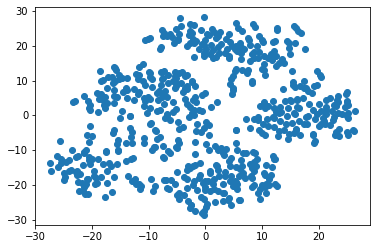

In [47]:
plt.scatter(df_data_tsne[0], df_data_tsne[1])

In [50]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_data_tsne)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\cjrad\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,233041.984375
1,2,127761.335938
2,3,82764.664062
3,4,56240.351562
4,5,35470.042969


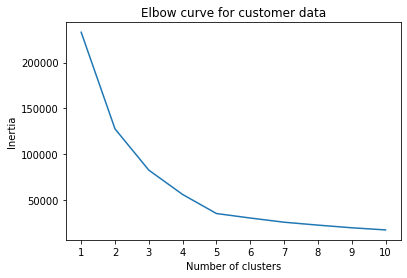

In [51]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

It appears likely that the patients can be clustered  (with 5 clusters) with some degree of accuracy using K-nearest means. The scatter plot demonstrated the natural formation of approximately 5 groupings, which one would assume a K-nearest-means would be able to identify. 